## DMML - Indian Air Quality

Task: The dataset (city_day.csv) contains air quality data and AQI (Air Quality Index) at hourly rate of various stations across multiple cities in India. The goal is to develop a model to estimate the AQI by consider all other factors.

We will be following this example step-by-step in this assessment:
1. Importing the libraries
1. Loading the data
1. Cleaning the data
1. Analyzing the dataset
1. Dividing the dataset into training and test dataset
1. Training several models and analyzing their performance
1. Selecting a model and evaluating using test dataset

In [1]:
import pandas as pd
import os
from sklearn import tree, ensemble, pipeline, linear_model, model_selection, preprocessing, decomposition, manifold, feature_selection, svm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb
from pylab import *

#Importing Data
dir = 'C:\\Users\\varya\\OneDrive\\Desktop\\DMML\\Final'
df = pd.read_csv(os.path.join(dir, 'city_day.csv'))
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None


In [2]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
df.shape

(29531, 16)

In [4]:
(df.isnull().sum()/len(df))*100

City           0.000000
Date           0.000000
PM2.5         15.570079
PM10          37.723071
NO            12.129626
NO2           12.139785
NOx           14.171549
NH3           34.973418
CO             6.972334
SO2           13.050692
O3            13.619586
Benzene       19.041008
Toluene       27.229014
Xylene        61.322001
AQI           15.851139
AQI_Bucket    15.851139
dtype: float64

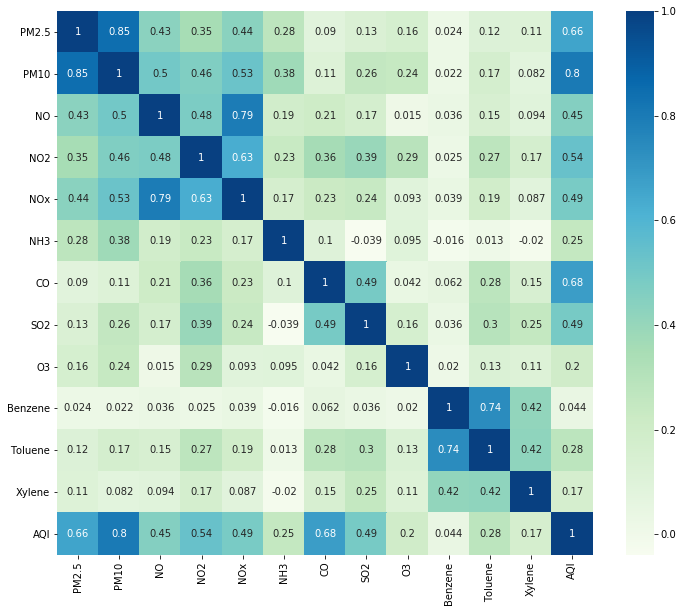

In [6]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True, cmap = 'GnBu')
plt.rcParams["figure.figsize"] = (12,10)
plt.show()

In [7]:
# Dropping columns as they have high collinearity
df=df.drop(['Xylene','PM10', 'AQI_Bucket'], axis=1)

In [8]:
#Filling the missing values for continuous variables with median
dh_col1 = ['NO', 'NO2', 'NOx', 'NH3', 'CO','SO2', 'O3','Benzene','Toluene']

for i in dh_col1:
    a = df[i].median()
    df[i].replace(np.nan , a,inplace =  True)

In [9]:
#Filling the missing values for continuous variables with median
dh_col1 = ['PM2.5', 'AQI']

for i in dh_col1:
    a = df[i].median()
    df[i].replace(np.nan , a,inplace =  True)

In [10]:
(df.isnull().sum()/len(df))*100

City       0.0
Date       0.0
PM2.5      0.0
NO         0.0
NO2        0.0
NOx        0.0
NH3        0.0
CO         0.0
SO2        0.0
O3         0.0
Benzene    0.0
Toluene    0.0
AQI        0.0
dtype: float64

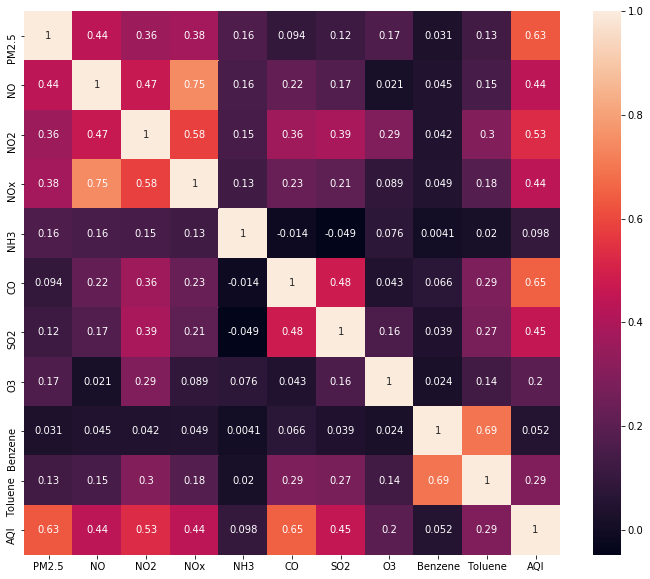

In [11]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.rcParams["figure.figsize"] = (12,10)
plt.show()

In [12]:
# Checking if there is any duplicate record for the same song
data_no_dupl = df.drop_duplicates()

In [13]:
data_no_dupl.describe(include='all')

,City,Date,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
count,29531,29531,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
unique,26,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Bengaluru,2020-05-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2009,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,64.510857,16.642601,27.726576,31.063568,20.813789,2.153872,13.830897,33.994121,2.859874,7.140485,158.781552
std,NaN,NaN,59.807551,21.506064,23.050531,29.477748,21.028862,6.724660,17.005647,20.202304,14.252822,17.224737,130.272413
min,NaN,NaN,0.040000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,13.000000
25%,NaN,NaN,32.150000,6.210000,12.980000,14.670000,12.040000,0.540000,6.090000,20.740000,0.240000,1.280000,88.000000
50%,NaN,NaN,48.570000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,118.000000
75%,NaN,NaN,72.450000,17.570000,34.665000,36.015000,21.755000,1.380000,13.810000,42.730000,2.420000,6.020000,179.000000


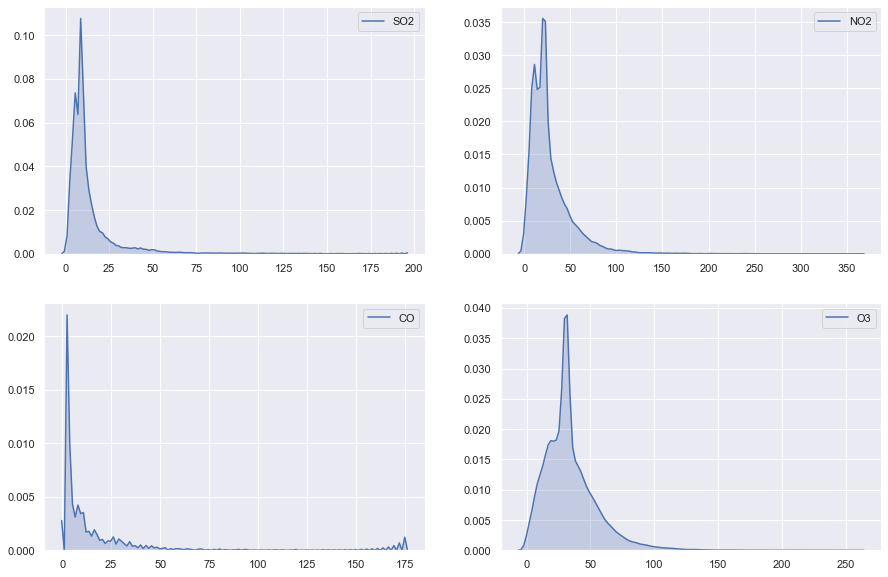

In [14]:
# Show all distribution plots simultaneously in four subplots 

sb.set(rc={"figure.figsize": (15, 10)})

subplot(2,2,1)
ax = sb.kdeplot(data_no_dupl['SO2'],shade=True)

subplot(2,2,2)
ax = sb.kdeplot(data_no_dupl['NO2'], shade=True)

subplot(2,2,3)
ax = sb.kdeplot(data_no_dupl['CO'], shade=True)

subplot(2,2,4)
ax = sb.kdeplot(data_no_dupl['O3'], shade=True)

In [15]:
q1 = data_no_dupl['PM2.5'].quantile(0.99)
q2 = data_no_dupl['NO'].quantile(0.99)
q3 = data_no_dupl['NO2'].quantile(0.99)
q4 = data_no_dupl['NOx'].quantile(0.99)
q5 = data_no_dupl['NH3'].quantile(0.99)
q6 = data_no_dupl['CO'].quantile(0.99)
q7 = data_no_dupl['SO2'].quantile(0.99)
q8 = data_no_dupl['O3'].quantile(0.99)
q9 = data_no_dupl['Benzene'].quantile(0.99)
q10 = data_no_dupl['Toluene'].quantile(0.99)
# Dropping observations that are greater than the 99% quantile, which lies above the value 33.
CO_outliers = data_no_dupl[data_no_dupl['PM2.5'] > q1]
CO_outliers = data_no_dupl[data_no_dupl['NO'] > q1]
CO_outliers = data_no_dupl[data_no_dupl['NO2'] > q1]
CO_outliers = data_no_dupl[data_no_dupl['NOx'] > q1]
CO_outliers = data_no_dupl[data_no_dupl['NH3'] > q1]
CO_outliers = data_no_dupl[data_no_dupl['CO'] > q1]
CO_outliers = data_no_dupl[data_no_dupl['SO2'] > q1]
CO_outliers = data_no_dupl[data_no_dupl['O3'] > q1]
CO_outliers = data_no_dupl[data_no_dupl['Benzene'] > q1]
CO_outliers = data_no_dupl[data_no_dupl['Toluene'] > q1]

data_no_dupl = data_no_dupl.drop(CO_outliers.index, axis= 0)


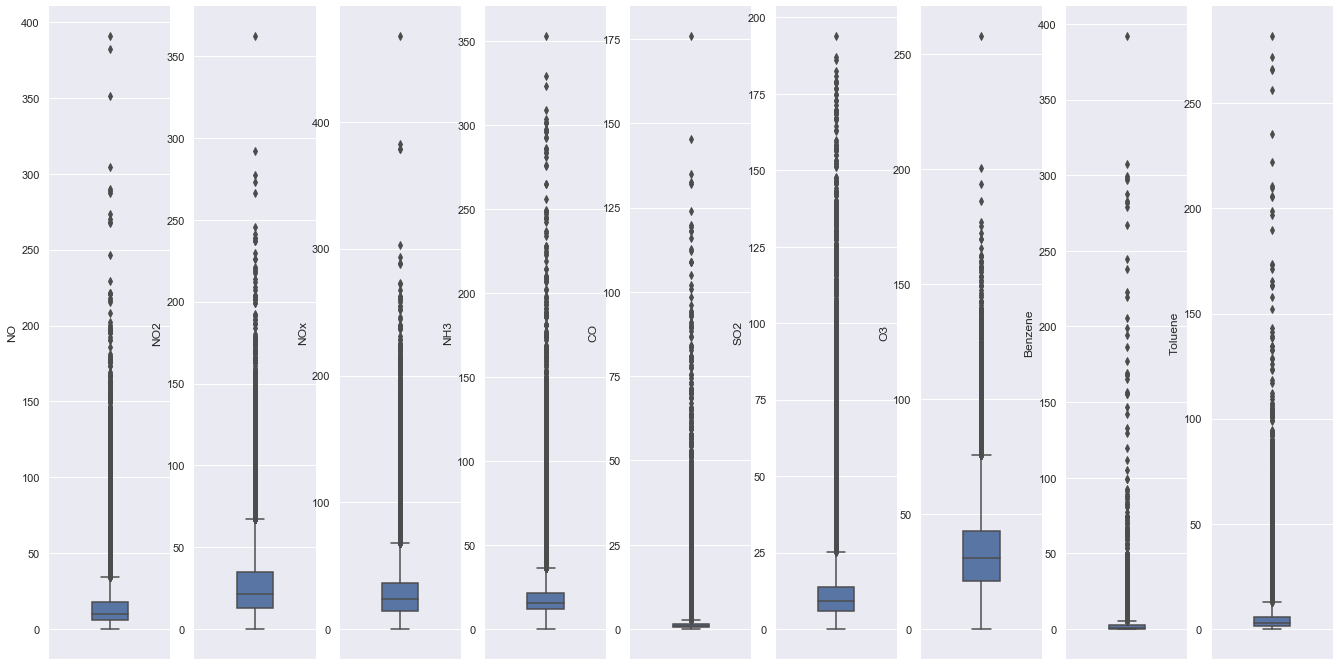

In [16]:
# Lets plot Boxplot for each column
# set up the axes of subplot:
f,ax = plt.subplots(1,9, figsize=(23,12))
sns.despine(left=True)
cols=['NO', 'NO2', 'NOx', 'NH3', 'CO','SO2', 'O3','Benzene','Toluene']
sns.boxplot(cols[0],data=data_no_dupl,orient='v',ax=ax[0],width=0.3)
sns.boxplot(cols[1],data=data_no_dupl,orient='v',ax=ax[1],width=0.3)
sns.boxplot(cols[2],data=data_no_dupl,orient='v',ax=ax[2],width=0.3)
sns.boxplot(cols[3],data=data_no_dupl,orient='v',ax=ax[3],width=0.3)
sns.boxplot(cols[4],data=data_no_dupl,orient='v',ax=ax[4],width=0.3)
sns.boxplot(cols[5],data=data_no_dupl,orient='v',ax=ax[5],width=0.3)
sns.boxplot(cols[6],data=data_no_dupl,orient='v',ax=ax[6],width=0.3)
sns.boxplot(cols[7],data=data_no_dupl,orient='v',ax=ax[7],width=0.3)
sns.boxplot(cols[8],data=data_no_dupl,orient='v',ax=ax[8],width=0.3)
plt.show()

In [17]:
data_no_dupl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29509 entries, 0 to 29530
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     29509 non-null  object 
 1   Date     29509 non-null  object 
 2   PM2.5    29509 non-null  float64
 3   NO       29509 non-null  float64
 4   NO2      29509 non-null  float64
 5   NOx      29509 non-null  float64
 6   NH3      29509 non-null  float64
 7   CO       29509 non-null  float64
 8   SO2      29509 non-null  float64
 9   O3       29509 non-null  float64
 10  Benzene  29509 non-null  float64
 11  Toluene  29509 non-null  float64
 12  AQI      29509 non-null  float64
dtypes: float64(11), object(2)
memory usage: 3.2+ MB


In [18]:
plot1= data_no_dupl

In [19]:
plot1 = plot1.drop(['City','Date', 'PM2.5','Benzene','Toluene'], axis=1)

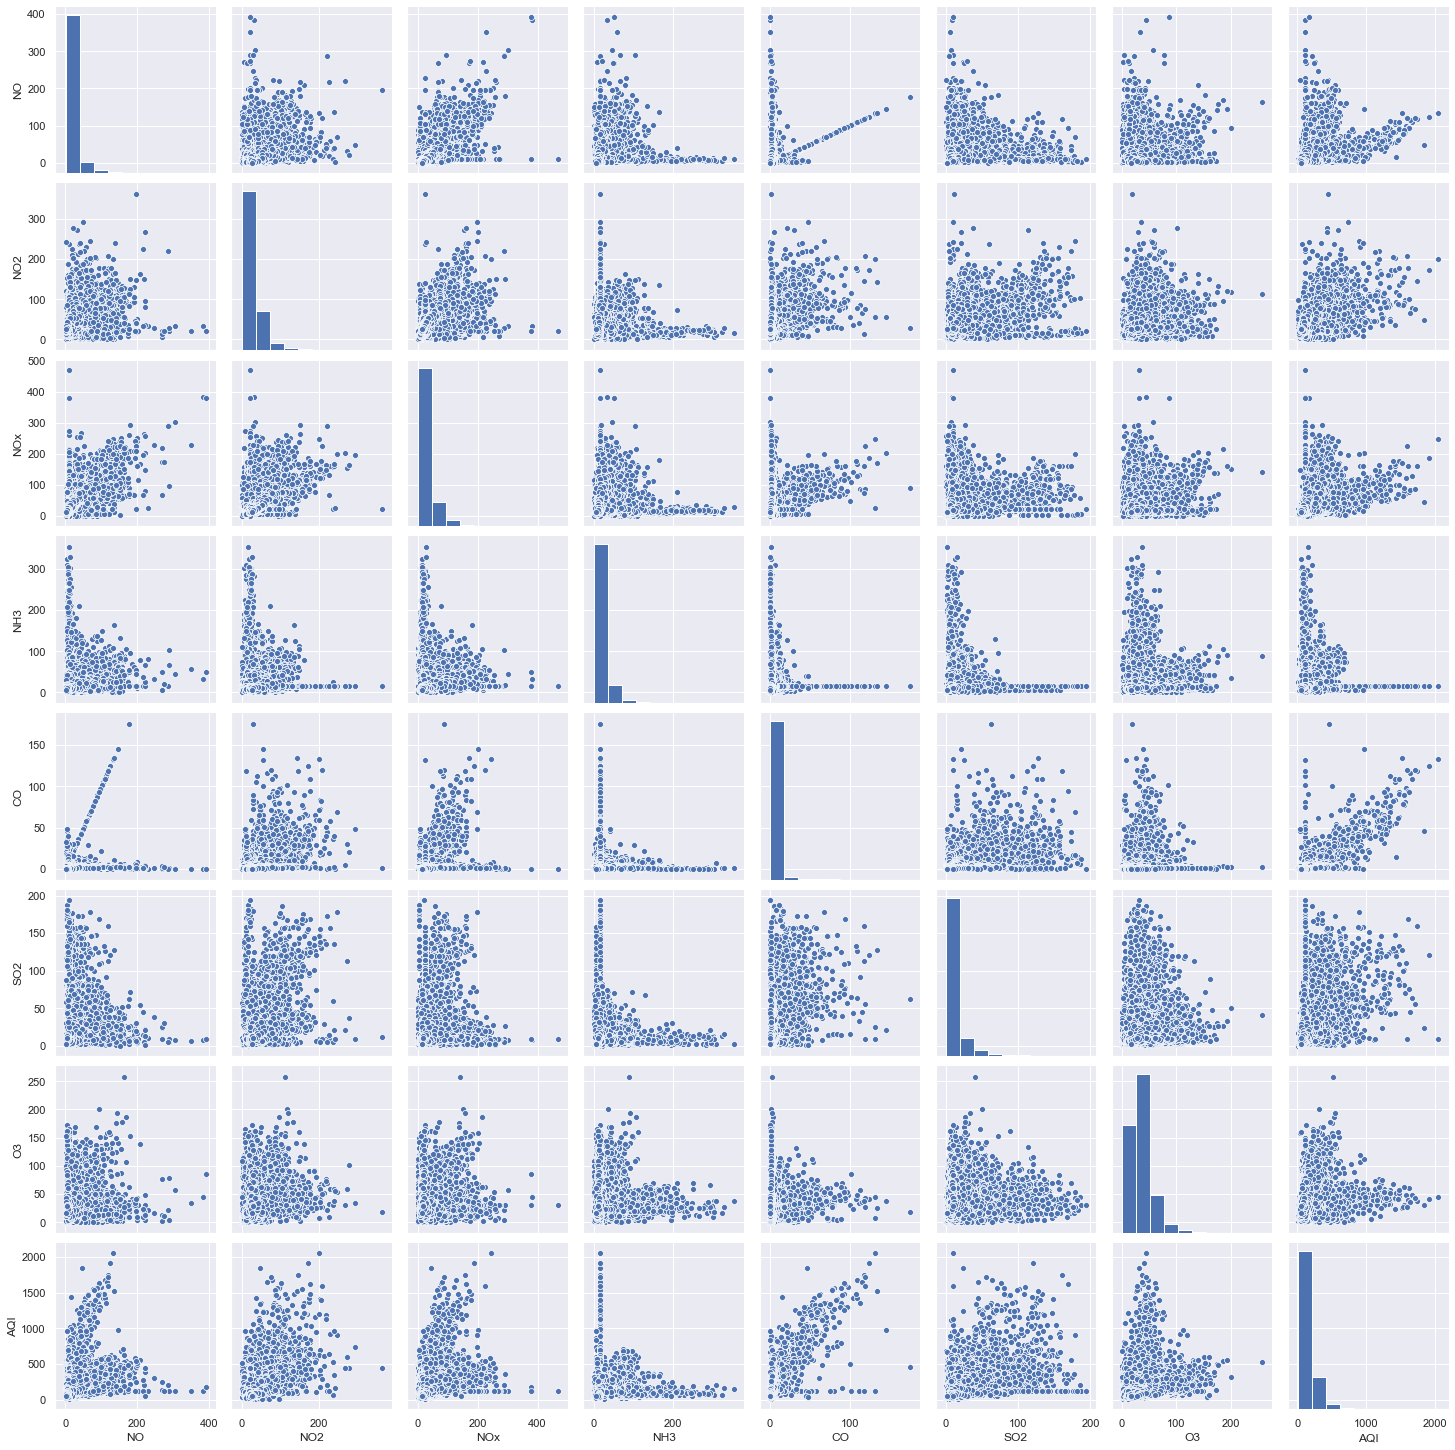

In [20]:
sns.pairplot(plot1)

In [21]:
import datetime as dt

data_no_dupl['Year'] = pd.to_datetime(data_no_dupl['Date']).dt.strftime('%Y') #Year
data_no_dupl['Month'] = pd.to_datetime(data_no_dupl['Date']).dt.strftime('%m') #Year
data_no_dupl['Extracted_Date'] = pd.to_datetime(data_no_dupl['Date']).dt.strftime('%d') #Year

In [22]:
data_no_dupl.head()

,City,Date,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Year,Month,Extracted_Date
0,Ahmedabad,2015-01-01,48.57,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,118.0,2015,01,01
1,Ahmedabad,2015-01-02,48.57,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,118.0,2015,01,02
2,Ahmedabad,2015-01-03,48.57,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,118.0,2015,01,03
3,Ahmedabad,2015-01-04,48.57,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,118.0,2015,01,04
4,Ahmedabad,2015-01-05,48.57,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,118.0,2015,01,05


In [23]:
data_no_dupl['Year'] = data_no_dupl.Year.astype(int)
data_no_dupl['Month'] = data_no_dupl.Month.astype(int)
data_no_dupl['Extracted_Date'] = data_no_dupl.Extracted_Date.astype(int)

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data_no_dupl['City']= le.fit_transform(data_no_dupl['City'])

In [25]:
data_no_dupl.drop(['Date'], axis = 1, inplace = True)

In [26]:
data_no_dupl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29509 entries, 0 to 29530
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   City            29509 non-null  int32  
 1   PM2.5           29509 non-null  float64
 2   NO              29509 non-null  float64
 3   NO2             29509 non-null  float64
 4   NOx             29509 non-null  float64
 5   NH3             29509 non-null  float64
 6   CO              29509 non-null  float64
 7   SO2             29509 non-null  float64
 8   O3              29509 non-null  float64
 9   Benzene         29509 non-null  float64
 10  Toluene         29509 non-null  float64
 11  AQI             29509 non-null  float64
 12  Year            29509 non-null  int32  
 13  Month           29509 non-null  int32  
 14  Extracted_Date  29509 non-null  int32  
dtypes: float64(11), int32(4)
memory usage: 4.4 MB


In [27]:
data_no_dupl.head()

,City,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,Year,Month,Extracted_Date
0,0,48.57,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,118.0,2015,1,1
1,0,48.57,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,118.0,2015,1,2
2,0,48.57,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,118.0,2015,1,3
3,0,48.57,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,118.0,2015,1,4
4,0,48.57,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,118.0,2015,1,5


In [28]:
X  =  data_no_dupl[['NO','NO2','NOx' , 'NH3' , 'CO' , 'SO2' ,'O3', 'Year', 'Month','Extracted_Date']]
y = data_no_dupl[['AQI']]

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(23607, 10) (5902, 10) (23607, 1) (5902, 1)


## Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train, y_train)
ylin_pred = lin.predict(X_test)

In [31]:
from sklearn import metrics

print("Mean absolute error:",metrics.mean_absolute_error(y_test, ylin_pred))
print("Mean Squared Error:",metrics.mean_squared_error(y_test, ylin_pred))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, ylin_pred)))
print("R2 score:{:0.2f}".format(metrics.r2_score(y_test, ylin_pred)*100),"%")

Mean absolute error: 52.486578969095554
Mean Squared Error: 6676.307262133655
Root Mean Squared Error: 81.70867311450881
R2 score:58.59 %


## Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor
import random
random.seed(1)
classifier = RandomForestRegressor(n_estimators = 50)
classifier.fit(X_train, y_train.values.ravel())
yRand_pred = classifier.predict(X_test)

In [33]:
print('Mean absolute error:',metrics.mean_absolute_error(y_test, yRand_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, yRand_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yRand_pred)))
print("R2 score:",metrics.r2_score(y_test, yRand_pred))

Mean absolute error: 32.228998386342
Mean Squared Error: 3431.60364820053
Root Mean Squared Error: 58.57989115900208
R2 score: 0.7871605433363895


## Decision Tree

In [34]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf.fit(X_train, y_train)
yDec_pred = clf.predict(X_test)

In [35]:
print('Mean absolute error:',metrics.mean_absolute_error(y_test, yDec_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, yDec_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yDec_pred)))
print('R2 score:',metrics.r2_score(y_test, yDec_pred))

Mean absolute error: 42.84092962837457
Mean Squared Error: 6634.435544448209
Root Mean Squared Error: 81.45204444609239
R2 score: 0.5885102706163151
